In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ship satellite data was imported from AIS and is now being transformed into a data frame object
df1 = pd.read_csv("AIS_2018_01_01.csv")
df1

In [ ]:
# When using MMSI unique (where MMSI is the ship´s unique identity number), we can count the ships in the data frame
print(df1.MMSI.unique())

# The MMSI list shows us the "names" of the ships, which we can now use for other funstions
# We now use MMSI==367033570 as an example to print the ship´s route
plt.figure()
x = grouped.get_group(367033570).sort_values("BaseDateTime").LAT
y = grouped.get_group(367033570).sort_values("BaseDateTime").LON
plt.plot(x,y)
plt.xlabel("LAT")
plt.ylabel("LON")
plt.title("MMSI=367033570")
plt.show()

In [7]:
# By using a folium map, we can see the ship´s route on a map
import folium
df1 = pd.read_csv("AIS_2018_01_01.csv")
grouped = df1.groupby("MMSI")
actual_map = folium.Map(location=[grouped.get_group(367033570).LAT.mean(),
                         grouped.get_group(367033570).LON.mean()],
              zoom_start=13)

f = folium.FeatureGroup("ship")
l = folium.vector_layers.PolyLine(zip(grouped.get_group(367033570).sort_values("BaseDateTime").LAT, 
                                      grouped.get_group(367033570).sort_values("BaseDateTime").LON),
                                 popup="367033570", color="red").add_to(f)

f.add_to(m)


actual_map

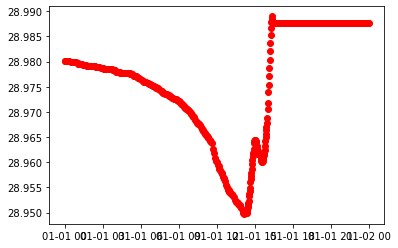

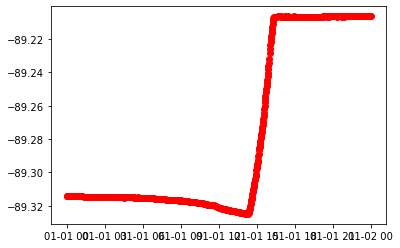

In [8]:
# By printing the Longitude and Latitude coordinates, we can see that some of the coordinates are missing
# DF Grouped für 367033570 nach BaseDateTime
grouped = df1.groupby("MMSI")
#df2 = pd.to_datetime(grouped.get_group(367033570).BaseDateTime).sort_values()
df2 = grouped.get_group(367033570)
df2 = df2.sort_values(by = ["BaseDateTime"])

plt.figure()
x = pd.to_datetime(df2.BaseDateTime)
y = df2.LAT
plt.scatter(x,y,c="red")
plt.show()

plt.figure()
x = pd.to_datetime(df2.BaseDateTime)
y = df2.LON
plt.scatter(x,y,c="red")
plt.show()

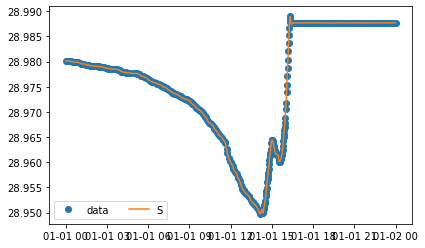

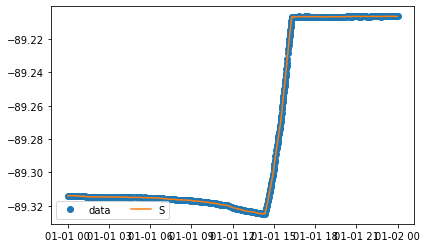

In [7]:
# We can now use a spline function to interpolate missing coordinates to arrive at the entire ship route
# We use one illustrative example in the following
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import datetime

x = pd.to_datetime(df2.BaseDateTime)
y = df2.LAT
cs = CubicSpline(x, y)

base = datetime.datetime(2018, 1, 1, 0, 0, 0)
xs = np.array([base + datetime.timedelta(minutes=i) for i in range(1440)])
xs = pd.to_datetime(xs)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x.to_numpy(), y, 'o', label='data')
ax.plot(xs, cs(xs), label="S")
ax.legend(loc='lower left', ncol=2)
plt.show()

x = pd.to_datetime(df2.BaseDateTime)
y = df2.LON
cs = CubicSpline(x, y)

base = datetime.datetime(2018, 1, 1, 0, 0, 0)
xs = np.array([base + datetime.timedelta(minutes=i) for i in range(1440)])
xs = pd.to_datetime(xs)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x.to_numpy(), y, 'o', label='data')
ax.plot(xs, cs(xs), label="S")
ax.legend(loc='lower left', ncol=2)
plt.show()

In [9]:
# On the basis of the developed code, we can now create one function which can later be used for all ships
df1 = pd.read_csv("AIS_2018_01_01.csv")
grouped = df1.groupby("MMSI")

def find_ship (grouped, MMSI_number, date_time):

    coordinates = []
    
    if isinstance(date_time, list):
        date_time = np.array(date_time, dtype='datetime64')
        
    if not isinstance(MMSI_number, list):
        MMSI_number = list(MMSI_number)
        
    for num in MMSI_number:
                
        df2 = grouped.get_group(num)
        df2 = df2.sort_values(by = ["BaseDateTime"]).drop_duplicates("BaseDateTime")

        x = pd.to_datetime(df2.BaseDateTime)
        y = df2.LAT
        cs_LAT = CubicSpline(x, y)

        x = pd.to_datetime(df2.BaseDateTime)
        y = df2.LON
        cs_LON = CubicSpline(x, y)

        coordinates.append((cs_LAT(date_time), cs_LON(date_time)) )
    
    return coordinates

find_ship(grouped, list(df1.MMSI.unique())[:99] , ["2018-01-01T00:00:02", "2018-01-01T00:00:03"])

[(array([-5.23580833e+17, -5.23580833e+17]),
  array([-4.41220124e+17, -4.41220124e+17])),
 (array([1.03962509e+17, 1.03962509e+17]),
  array([-1.00533406e+17, -1.00533406e+17])),
 (array([7.99717147e+16, 7.99717147e+16]),
  array([-1.9151561e+15, -1.9151561e+15])),
 (array([-1.8731815e+18, -1.8731815e+18]),
  array([-2.52366138e+18, -2.52366138e+18])),
 (array([9.62692834e+17, 9.62692834e+17]),
  array([-9.06243471e+17, -9.06243471e+17])),
 (array([-8.69515829e+17, -8.69515829e+17]),
  array([-6.7462821e+17, -6.7462821e+17])),
 (array([-5.48077229e+16, -5.48077229e+16]),
  array([9.59717131e+16, 9.59717131e+16])),
 (array([2.43957458e+17, 2.43957458e+17]),
  array([2.30916843e+17, 2.30916843e+17])),
 (array([-2.19235042e+17, -2.19235042e+17]),
  array([4.00626688e+17, 4.00626688e+17])),
 (array([4.50605865e+16, 4.50605865e+16]),
  array([2.32392129e+16, 2.32392129e+16])),
 (array([-1.0135479e+18, -1.0135479e+18]),
  array([4.81498732e+16, 4.81498732e+16])),
 (array([4.75810536e+17, 4.

                      location  \
0      Port of South Louisiana   
1              Port of Houston   
2            Port of Newark_NY   
3             Port of Beaumont   
4           Port of Long Beach   
5        Port of Hampton Roads   
6          Port of New Orleans   
7       Port of Corpus Christi   
8  Port of Greater Baton Rouge   

                                            geometry  
0  POLYGON ((-90.61661 30.06018, -90.60837 30.016...  
1  POLYGON ((-95.19859 29.77153, -95.20786 29.745...  
2  POLYGON ((-74.13643 40.71998, -74.16870 40.699...  
3  POLYGON ((-94.10921 30.10058, -94.11024 30.086...  
4  POLYGON ((-118.28257 33.77330, -118.28909 33.7...  
5  POLYGON ((-76.39409 36.91751, -76.38928 36.891...  
6  POLYGON ((-90.10537 29.94423, -90.10983 29.921...  
7  POLYGON ((-95.08973 29.57614, -95.09797 29.557...  
8  POLYGON ((-91.22076 30.48359, -91.22419 30.442...  


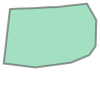

In [12]:
# We have also created a list of the ten most frequently used ports in the US with the help of a geojson format
# For one port example (namely the Long Beach port), we now investigate which ships are in the image

import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

ports_coordinates = gpd.read_file("ports_us.geojson")
print(ports_coordinates)

# Long Beach illustrative example 
LB_port = ports_coordinates.iloc[4]
LB_coordinates = LB_port.geometry
LB_coordinates

In [10]:
# Assessment whether ship is detectable in the previour coordinates  
# if True: Ship´s MMSI needs to be attached to list of matches 
df_2019 = pd.read_csv("AIS_2019_01_01.csv")

# convert df to geodataframe
gdf_2019 = gpd.GeoDataFrame(
    df_2019, geometry=gpd.points_from_xy(df_2019.LON, df_2019.LAT))
gdf_2019.set_crs(epsg=4326, inplace=True)

# create list of MMSIs that fall within shape
ships_in_LB = df_2019[gdf_2019.within(LB_coordinates).values].MMSI.unique()
print(ships_in_LB)

NameError: name 'gpd' is not defined

In [ ]:
# We can run the analysis for all ships and count the matches between ports and ships
# To make it more illustrative, we depict the matches with the help of a matrix
import pandas as pd
import sqlite3
import seaborn as sns

# Receive port names
con = sqlite3.connect("ships_us.sql")
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
ports = cursor.fetchall()

# Transform each table into dataframe 
df_list = []
for name in ports: 
        port = pd.read_sql_table(name[0], 'sqlite:///ships_us.sql')
        df_list.append(port)

# Create list of MMSI numbers in Dataframes
all_ports = {}
for i, port in enumerate(df_list):
    all_ports[ports[i][0]] = []
    for MMSI in port["MMSI"].unique():
        all_ports[ports[i][0]].append(MMSI)

# Create DF with n rows and n columns, where n is the number of ports
col_row = []
for port in all_ports.keys():
    col_row.append(port)
      
matches = {}
for port in col_row:
    matches[port] = []
    for names in all_ports.keys():
        matches[port].append(len(set(all_ports[names]).intersection(set(all_ports[port]))))

DF_matches = pd.DataFrame(matches, columns = matches, index = col_row)
sns.heatmap(DF_matches, annot=True, fmt='d', cmap = "Blues")